# Locally weighted linear regression

To predict a continuous outcome $\tilde{y}$ for a new vector of features $\tilde{x}$, we fit $\theta$ to minimize the loss function $\sum_{i=1}^{m} w^{(i)} (y^{(i)} - \theta^T x^{(i)})^2$, and then calculate $\theta^T \tilde{x}$, where the $w^{(i)}$'s are non-negative weights, e.g., $w^{(i)} = exp\Big( - \dfrac{(x^{(i)} - x)^T(x^{(i)} - x)}{2 \tau^2} \Big)$, where $\tau$ is a bandwidth parameter. As $\tau$ decreases, distant values of $x$ have less impact on the predicted values of $\tilde{y}$ in the neighborhood of $\tilde{x}$, leading to more squiggly functions. If $\tau$ is large, then distant values are weighted similarly to nearby values, making the function more linear.

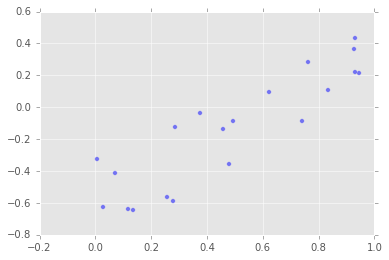

In [103]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.style.use('ggplot')

def calc_weight(x_i, x_new, tau):
    vdiff = x_i - x_new
    numer = np.dot(np.transpose(vdiff), vdiff)
    denom = 2 * tau ** 2
    w_i = np.exp(- numer / denom)
    return w_i

def loss_fn(theta, y, X, x_new, tau):
    m = len(y)
    w = 0
    val = np.empty(m)
    for i in range(0, m):
        w = calc_weight(X[i, ], x_new, tau)
        val[i] = w * (y[i] - np.dot(np.transpose(theta), X[i, ])) ** 2
    return sum(val)

def sim_reg(N, n, sigma):
    intercept = np.repeat(1, N)
    if n > 1:
        x = np.random.rand(N, n - 1)
        X = np.column_stack((intercept, x))
    else:
        X = intercept
    beta = np.random.normal(0, 1, n)
    mu_y = np.dot(X, beta)
    y = np.random.normal(mu_y, sigma, N)
    return {'beta':beta, 'y':y, 'X':X, 'n':n, 'N':N}

out = sim_reg(20, 2, .2)

plt.scatter(out['X'][:, 1], out['y'], c='blue', alpha=.5)

Now, we can minimize our loss function at each input x with varying bandwidths ($\tau$).

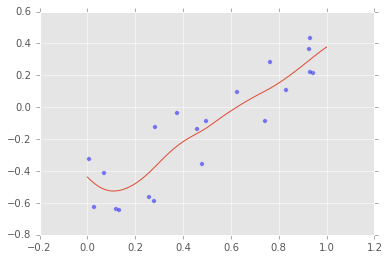

In [104]:
tau = .1
n_new = 100
X_new = np.column_stack((np.repeat(1, n_new), 
                         np.linspace(0, 1, n_new)))
y_new = np.empty(n_new)

for j in range(0, n_new):
    theta0 = np.random.normal(0, 1, np.shape(X_new)[1])

    res = minimize(loss_fn, theta0, method='nelder-mead', options={'xtol': 1e-8}, 
                   args=(out['y'], out['X'], X_new[j, ], tau))
    y_new[j] = np.dot(np.transpose(res['x']), X_new[j, ])
    
plt.scatter(out['X'][:, 1], out['y'], c='blue', alpha=.5)
plt.plot(X_new[:, 1], y_new)

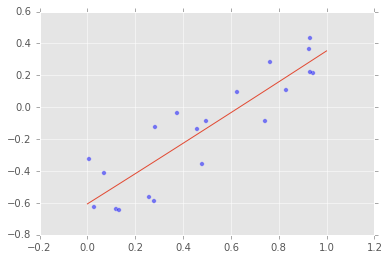

In [105]:
tau = 1

for j in range(0, n_new):
    theta0 = np.random.normal(0, 1, np.shape(X_new)[1])

    res = minimize(loss_fn, theta0, method='nelder-mead', options={'xtol': 1e-8}, 
                   args=(out['y'], out['X'], X_new[j, ], tau))
    y_new[j] = np.dot(np.transpose(res['x']), X_new[j, ])
    
plt.scatter(out['X'][:, 1], out['y'], c='blue', alpha=.5)
plt.plot(X_new[:, 1], y_new)

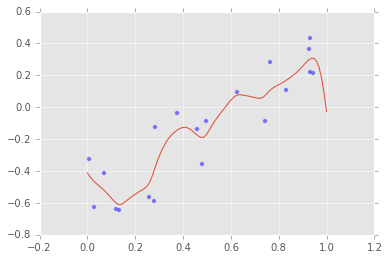

In [106]:
tau = .05

for j in range(0, n_new):
    theta0 = np.random.normal(0, 1, np.shape(X_new)[1])

    res = minimize(loss_fn, theta0, method='nelder-mead', options={'xtol': 1e-8}, 
                   args=(out['y'], out['X'], X_new[j, ], tau))
    y_new[j] = np.dot(np.transpose(res['x']), X_new[j, ])
    
plt.scatter(out['X'][:, 1], out['y'], c='blue', alpha=.5)
plt.plot(X_new[:, 1], y_new)